In [1]:
import math
import collections
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.options.display.max_rows = 10

In [3]:
path = os.getcwd()
path

'C:\\Users\\Nasim\\Documents\\Heriot Watt Uni\\Dissertation\\Analysis'

In [4]:
incident_df_all = pd.read_excel('Incident Flagged Data\\hl2010toPresent.xlsx', sheet_name='hl2010toPresent')

In [5]:
item_involved = ['PIPE']

In [7]:
incident_df = incident_df_all.loc[(incident_df_all['IYEAR'] != 2021) & (incident_df_all['ON_OFF_SHORE'] == 'ONSHORE') & (incident_df_all['SYSTEM_PART_INVOLVED'] == 'ONSHORE PIPELINE, INCLUDING VALVE SITES') & (incident_df_all['ITEM_INVOLVED'].isin(item_involved))]

In [ ]:
incident_df = incident_df.set_index('IYEAR')

In [179]:
incident_df.to_csv('incident_df_hl.csv')

In [10]:
incident_df['MAP_CAUSE'].value_counts(ascending=False)

CORROSION                      326
MATERIAL/WELD/EQUIP FAILURE    155
EXCAVATION DAMAGE              134
OTHER OUTSIDE FORCE DAMAGE      40
INCORRECT OPERATION             25
NATURAL FORCE DAMAGE            20
ALL OTHER CAUSES                16
Name: MAP_CAUSE, dtype: int64

In [11]:
incident_df['MAP_CAUSE'].describe()

count           716
unique            7
top       CORROSION
freq            326
Name: MAP_CAUSE, dtype: object

In [12]:
cause_percent = pd.DataFrame()
cause_percent = incident_df['MAP_CAUSE'].value_counts(normalize=True)[:]*100
cause_percent

CORROSION                      45.530726
MATERIAL/WELD/EQUIP FAILURE    21.648045
EXCAVATION DAMAGE              18.715084
OTHER OUTSIDE FORCE DAMAGE      5.586592
INCORRECT OPERATION             3.491620
NATURAL FORCE DAMAGE            2.793296
ALL OTHER CAUSES                2.234637
Name: MAP_CAUSE, dtype: float64

In [14]:
incident_df['MAP_SUBCAUSE'].value_counts(normalize=True)[:]*100

EXTERNAL                                             29.608939
INTERNAL                                             15.921788
THIRD PARTY EXCAVATION DAMAGE                        12.709497
MANUFACTURING-RELATED                                12.011173
CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED     5.865922
                                                       ...    
FISHING OR MARITIME ACTIVITY                          0.139665
NON-THREADED CONNECTION FAILURE                       0.139665
MALFUNCTION OF CONTROL/RELIEF EQUIPMENT               0.139665
TEMPERATURE                                           0.139665
INCORRECT EQUIPMENT                                   0.139665
Name: MAP_SUBCAUSE, Length: 31, dtype: float64

In [15]:
corrosion_int_ext = incident_df.loc[incident_df['MAP_CAUSE'] == 'CORROSION']['MAP_SUBCAUSE'].value_counts(normalize=True)[:]*100
corrosion_int_ext

EXTERNAL    65.030675
INTERNAL    34.969325
Name: MAP_SUBCAUSE, dtype: float64

In [16]:
incident_df.loc[incident_df['MAP_CAUSE'] == 'EXCAVATION DAMAGE']['MAP_SUBCAUSE'].value_counts(normalize=True)[:]*100

THIRD PARTY EXCAVATION DAMAGE            67.910448
OPERATOR/CONTRACTOR EXCAVATION DAMAGE    19.402985
PREVIOUS DAMAGE DUE TO EXCAVATION        12.686567
Name: MAP_SUBCAUSE, dtype: float64

In [17]:
incident_df.loc[incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE']['MAP_SUBCAUSE'].value_counts(normalize=True)[:]*100

MANUFACTURING-RELATED                                55.483871
CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED    27.096774
ENVIRONMENTAL CRACKING-RELATED                       14.838710
OTHER EQUIPMENT FAILURE                               1.290323
NON-THREADED CONNECTION FAILURE                       0.645161
MALFUNCTION OF CONTROL/RELIEF EQUIPMENT               0.645161
Name: MAP_SUBCAUSE, dtype: float64

In [184]:
cause_percent = cause_percent[['EXCAVATION DAMAGE', 'CORROSION', 'MATERIAL/WELD/EQUIP FAILURE', 'NATURAL FORCE DAMAGE',
       'OTHER OUTSIDE FORCE DAMAGE', 'INCORRECT OPERATION', 'ALL OTHER CAUSES']]

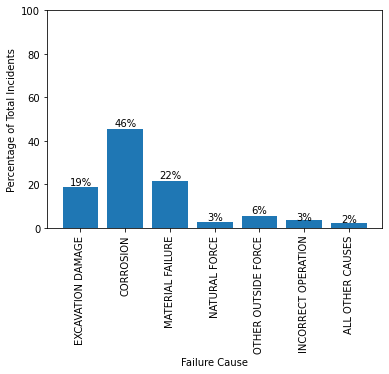

In [185]:
#Stacked bar graph
#cause_percent.plot(kind = 'bar', stacked = True, mark_right = True)
n = len(cause_percent.index)
x = np.arange(n)
labels = ['EXCAVATION DAMAGE', 'CORROSION', 'MATERIAL FAILURE', 
  'NATURAL FORCE', 'OTHER OUTSIDE FORCE', 'INCORRECT OPERATION', 'ALL OTHER CAUSES']

windth = 10
fig, ax = plt.subplots()

a = ax.bar(x,cause_percent.values , align = 'center' ) 

#xticks 
plt.xticks(x, labels, rotation=90) 

#x-axis labels 
plt.xlabel('Failure Cause') 


#y-axis labels 
plt.ylabel('Percentage of Total Incidents') 
plt.ylim(top=100)

#plot title 
#plt.title('Ditribution of Incidents by Cause') 

#Legend
#plt.legend(['Cause'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\Cause_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

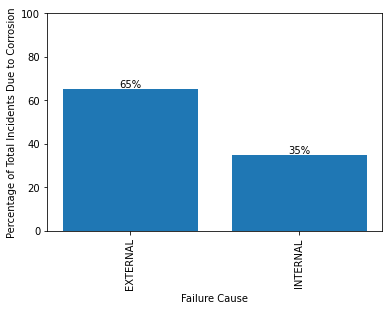

In [19]:
#Stacked bar graph
#corrosion_int_ext.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(corrosion_int_ext.index,corrosion_int_ext.values , align = 'center' ) 

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Failure Cause') 


#y-axis labels 
plt.ylabel('Percentage of Total Incidents Due to Corrosion') 
plt.ylim(top=100)

#plot title 
#plt.title('Ditribution of Incidents Due to Corrosion by Sub-Cause') 

#Legend
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\Corrosion_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [21]:
incident_df['MATERIAL_INVOLVED'].value_counts(normalize=True)[:]*100

CARBON STEEL                        99.84985
MATERIAL OTHER THAN CARBON STEEL     0.15015
Name: MATERIAL_INVOLVED, dtype: float64

In [24]:
commodity_percent = incident_df['COMMODITY_RELEASED_TYPE'].value_counts(normalize=True)[:]*100
commodity_percent

CRUDE OIL                                                                             49.162011
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS    27.793296
HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS            21.229050
CO2 (CARBON DIOXIDE)                                                                   1.815642
Name: COMMODITY_RELEASED_TYPE, dtype: float64

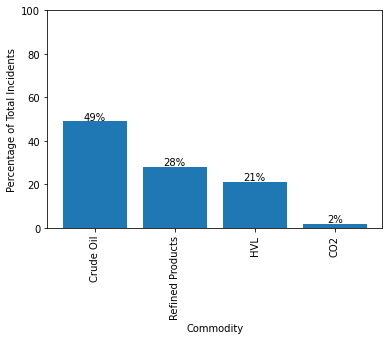

In [28]:
#Stacked bar graph
#commodity_percent.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(['Crude Oil', 'Refined Products','HVL', 'CO2'],commodity_percent.values , align = 'center' ) 

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Commodity') 


#y-axis labels 
plt.ylabel('Percentage of Total Incidents') 
plt.ylim(top=100)


#plot title 
#plt.title('Ditribution of Incidents by Commodity') 

#Legend
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\Commodity_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [61]:
excavation_com_percent = incident_df.loc[incident_df['MAP_CAUSE']=='EXCAVATION DAMAGE']['COMMODITY_RELEASED_TYPE'].value_counts(normalize=True)[:]*100
corrosion_com_percent = incident_df.loc[incident_df['MAP_CAUSE']=='CORROSION']['COMMODITY_RELEASED_TYPE'].value_counts(normalize=True)[:]*100
material_com_percent = incident_df.loc[incident_df['MAP_CAUSE']=='MATERIAL/WELD/EQUIP FAILURE']['COMMODITY_RELEASED_TYPE'].value_counts(normalize=True)[:]*100

excavation_com_percent['CO2 (CARBON DIOXIDE)'] = 0

excavation_com_percent = excavation_com_percent[['CRUDE OIL', 'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS','HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS', 'CO2 (CARBON DIOXIDE)']]
corrosion_com_percent = corrosion_com_percent[['CRUDE OIL', 'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS','HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS', 'CO2 (CARBON DIOXIDE)']]
material_com_percent = material_com_percent[['CRUDE OIL', 'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS','HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS', 'CO2 (CARBON DIOXIDE)']]


In [68]:
material_com_percent

CRUDE OIL                                                                             29.677419
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS    33.548387
HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS            32.258065
CO2 (CARBON DIOXIDE)                                                                   4.516129
Name: COMMODITY_RELEASED_TYPE, dtype: float64

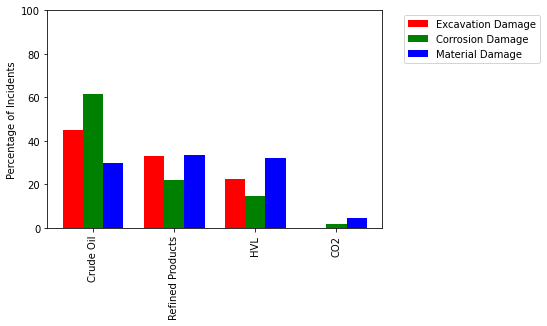

In [65]:
#probably not useful
n = len(list(excavation_com_percent.index))
x = np.arange(n)  # the label locations
width = 0.25  # the width of the bars

x_axis = ['Crude Oil', 'Refined Products','HVL', 'CO2']

fig, ax = plt.subplots()
plt.bar(x , list(excavation_com_percent.values), width, color = 'r', label='Excavation Damage')
plt.bar(x + width, list(corrosion_comm_percent.values), width, color = 'g', label='Corrosion Damage')
plt.bar(x + width*2, list(material_com_percent.values), width, color = 'b', label='Material Damage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Incidents')
ax.set_ylim(top=100)
ax.set_title('')
plt.xticks(x + width, x_axis, rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\cause_commodity_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')  

plt.show()

In [80]:
corrosion_int_com_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='CORROSION') & (incident_df['MAP_SUBCAUSE']=='INTERNAL')]['COMMODITY_RELEASED_TYPE'].value_counts(normalize=True)[:]*100
corrosion_ext_com_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='CORROSION') & (incident_df['MAP_SUBCAUSE']=='EXTERNAL')]['COMMODITY_RELEASED_TYPE'].value_counts(normalize=True)[:]*100

In [81]:
corrosion_int_com_percent['CO2 (CARBON DIOXIDE)'] = 0
corrosion_ext_com_percent = corrosion_ext_com_percent[['CRUDE OIL', 'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS','HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS', 'CO2 (CARBON DIOXIDE)']]
corrosion_int_com_percent = corrosion_int_com_percent[['CRUDE OIL', 'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS','HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS', 'CO2 (CARBON DIOXIDE)']]

In [84]:
corrosion_int_com_percent

CRUDE OIL                                                                             95.614035
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS     2.631579
HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS             1.754386
CO2 (CARBON DIOXIDE)                                                                   0.000000
Name: COMMODITY_RELEASED_TYPE, dtype: float64

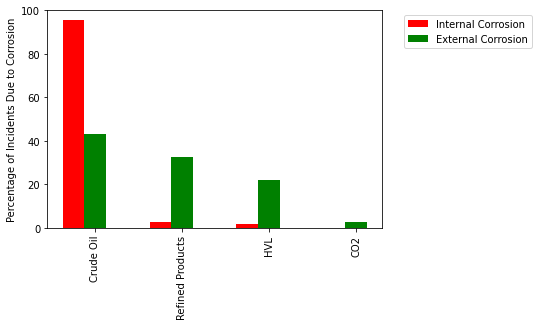

In [83]:
#probably not useful
n = len(list(corrosion_int_com_percent.index))
x = np.arange(n)  # the label locations
width = 0.25  # the width of the bars

x_axis = ['Crude Oil', 'Refined Products','HVL', 'CO2']

fig, ax = plt.subplots()
plt.bar(x , list(corrosion_int_com_percent.values), width, color = 'r', label='Internal Corrosion')
plt.bar(x + width, list(corrosion_ext_com_percent.values), width, color = 'g', label='External Corrosion')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Incidents Due to Corrosion')
ax.set_ylim(top=100)
ax.set_title('')
plt.xticks(x + width, x_axis, rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\cause_commodity_corrosion_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')  

plt.show()

In [85]:
#coating, adding a cp type column to integrate both coating and cp. This does not consider incidents where info is not provided
incident_df['CP_Types'] = None
incident_df.loc[(incident_df['PIPE_COATING_TYPE']== 'NONE')& (incident_df['UNDER_CATHODIC_PROTECTION_IND'] == 'YES'),'CP_Types'] = 'CPB'
incident_df.loc[(incident_df['PIPE_COATING_TYPE']== 'NONE')& (incident_df['UNDER_CATHODIC_PROTECTION_IND'] == 'NO'), 'CP_Types'] = 'CUB'
incident_df.loc[(incident_df['PIPE_COATING_TYPE'] != 'NONE')& (incident_df['UNDER_CATHODIC_PROTECTION_IND'] == 'YES'), 'CP_Types'] = 'CPC'
incident_df.loc[(incident_df['PIPE_COATING_TYPE'] != 'NONE')& (incident_df['UNDER_CATHODIC_PROTECTION_IND'] == 'NO'), 'CP_Types'] = 'CUC'

In [86]:
cp_corrosion_ext_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='CORROSION') & (incident_df['MAP_SUBCAUSE']=='EXTERNAL')]['CP_Types'].value_counts(normalize = True)[:]*100
cp_corrosion_ext_percent

CPC    85.474860
CPB    10.614525
CUC     2.793296
CUB     1.117318
Name: CP_Types, dtype: float64

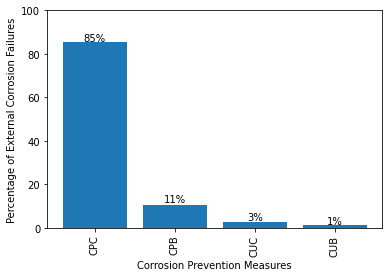

In [87]:
#Stacked bar graph
#cp_corrosion_ext_percent.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(cp_corrosion_ext_percent.index, cp_corrosion_ext_percent.values , align = 'center' ) 

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Corrosion Prevention Measures') 


#y-axis labels 
plt.ylabel('Percentage of External Corrosion Failures') 
plt.ylim(top=100)


#plot title 
#plt.title('Ditribution of External Corrosion Failures by Corrosion Prevention Measures') 

#Legend
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\cp_corrosion_ext_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [88]:
#Installation decade calculations
incident_df['Installation_Decade'] = 'Unknown'

#change installation year to float
incident_df.loc[incident_df['INSTALLATION_YEAR'] == 'UNKNOWN'] = None
pd.to_numeric(incident_df['INSTALLATION_YEAR'])

#setting Installation Decade
incident_df.loc[incident_df['INSTALLATION_YEAR'] < 1940, 'Installation_Decade'] = 'Pre 1940'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 1940) & (incident_df['INSTALLATION_YEAR'] <1950), 'Installation_Decade'] = '1940s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 1950) & (incident_df['INSTALLATION_YEAR'] <1960), 'Installation_Decade'] = '1950s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 1960) & (incident_df['INSTALLATION_YEAR'] <1970), 'Installation_Decade'] = '1960s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 1970) & (incident_df['INSTALLATION_YEAR'] <1980), 'Installation_Decade'] = '1970s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 1980) & (incident_df['INSTALLATION_YEAR'] <1990), 'Installation_Decade'] = '1980s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 1990) & (incident_df['INSTALLATION_YEAR'] <2000), 'Installation_Decade'] = '1990s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 2000) & (incident_df['INSTALLATION_YEAR'] <2010), 'Installation_Decade'] = '2000s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 2010) & (incident_df['INSTALLATION_YEAR'] <2020), 'Installation_Decade'] = '2010s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 2020) , 'Installation_Decade'] = '2020s'

In [89]:
incident_df['Installation_Decade'].describe()

count       716
unique       10
top       1950s
freq        153
Name: Installation_Decade, dtype: object

In [91]:
# Calculating percentages and Rearrangin columns for a better looking graph
installation_percent = incident_df['Installation_Decade'].value_counts(normalize=True)[:]*100
installation_percent['2020s'] = 0
installation_percent = installation_percent[['Pre 1940', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s','2020s' ,'Unknown']]
installation_percent

Pre 1940     5.307263
1940s        9.776536
1950s       21.368715
1960s       19.553073
1970s       11.312849
              ...    
1990s        4.050279
2000s        2.653631
2010s        5.586592
2020s        0.000000
Unknown     16.340782
Name: Installation_Decade, Length: 11, dtype: float64

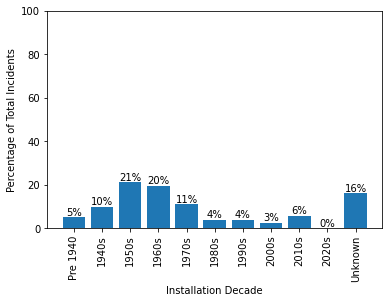

In [186]:
#Stacked bar graph
#installation_percent.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(installation_percent.index,installation_percent.values , align = 'center' ) 


#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Installation Decade') 


#y-axis labels 
plt.ylabel('Percentage of Total Incidents') 
plt.ylim(top=100)


#plot title 
#plt.title('Ditribution of Incidents by Installation Year') 

#Legend
#plt.legend(['Installation Decade'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\Installation_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [93]:
excavation_inst_percent = incident_df.loc[incident_df['MAP_CAUSE']=='EXCAVATION DAMAGE']['Installation_Decade'].value_counts(normalize=True)[:]*100
corrosion_inst_percent = incident_df.loc[incident_df['MAP_CAUSE']=='CORROSION']['Installation_Decade'].value_counts(normalize=True)[:]*100
material_inst_percent = incident_df.loc[incident_df['MAP_CAUSE']=='MATERIAL/WELD/EQUIP FAILURE']['Installation_Decade'].value_counts(normalize=True)[:]*100


In [98]:
#adding the missing decades, there should be a better way to do this
excavation_inst_percent['2020s'] = 0
corrosion_inst_percent['2020s'] = 0
material_inst_percent['2020s'] = 0

#correcting the order
excavation_inst_percent = excavation_inst_percent[['Pre 1940', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s','2020s' ,'Unknown']]
corrosion_inst_percent = corrosion_inst_percent[['Pre 1940', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s','2020s' ,'Unknown']]
material_inst_percent = material_inst_percent[['Pre 1940', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s','2020s' ,'Unknown']]

In [150]:
material_inst_percent

Pre 1940     1.935484
1940s        5.806452
1950s       21.935484
1960s       30.967742
1970s       16.129032
              ...    
1990s        2.580645
2000s        3.225806
2010s        3.870968
2020s        0.000000
Unknown      7.741935
Name: Installation_Decade, Length: 11, dtype: float64

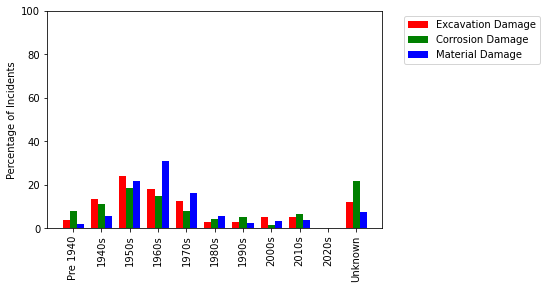

In [99]:
n = len(list(installation_percent.index))
x = np.arange(n)  # the label locations
width = 0.25  # the width of the bars

x_axis = list(installation_percent.index)

fig, ax = plt.subplots()
plt.bar(x , list(excavation_inst_percent.values), width, color = 'r', label='Excavation Damage')
plt.bar(x + width, list(corrosion_inst_percent.values), width, color = 'g', label='Corrosion Damage')
plt.bar(x + width*2, list(material_inst_percent.values), width, color = 'b', label='Material Damage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Incidents')
ax.set_ylim(top=100)
ax.set_title('')
plt.xticks(x + width, x_axis, rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\cause_installation_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')  

plt.show()

In [100]:
# Setting pipe diameter ranges
incident_df['Diameter_Range'] = None

#setting diameter categories
incident_df.loc[incident_df['PIPE_DIAMETER'] <= 4, 'Diameter_Range'] = 'd<=4'
incident_df.loc[(incident_df['PIPE_DIAMETER'] > 4) & (incident_df['PIPE_DIAMETER'] <=10), 'Diameter_Range'] = '4<d<=10'
incident_df.loc[(incident_df['PIPE_DIAMETER'] > 10) & (incident_df['PIPE_DIAMETER'] <=20), 'Diameter_Range'] = '10<d<=20'
incident_df.loc[(incident_df['PIPE_DIAMETER'] > 20) & (incident_df['PIPE_DIAMETER'] <=28), 'Diameter_Range'] = '20<d<=28'
incident_df.loc[incident_df['PIPE_DIAMETER'] > 28, 'Diameter_Range'] = '28<d'

In [101]:
# Calculating percentages and Rearrangin columns for a better looking graph
diameter_percent = incident_df['Diameter_Range'].value_counts(normalize=True)[:]*100
diameter_percent = diameter_percent[['d<=4', '4<d<=10', '10<d<=20','20<d<=28', '28<d']]
diameter_percent

d<=4         3.458647
4<d<=10     55.187970
10<d<=20    33.533835
20<d<=28     4.060150
28<d         3.759398
Name: Diameter_Range, dtype: float64

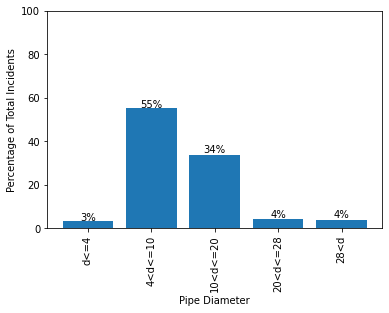

In [102]:
#Stacked bar graph
#diameter_percent.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(diameter_percent.index,diameter_percent.values , align = 'center' ) 

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Pipe Diameter') 


#y-axis labels 
plt.ylabel('Percentage of Total Incidents') 
plt.ylim(top=100)


#plot title 
#plt.title('Ditribution of Incidents by Pipe Diameter') 

#Legend
#plt.legend(['Pipe Diameter'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\Diameter_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [103]:
excavation_d_percent = incident_df.loc[incident_df['MAP_CAUSE']=='EXCAVATION DAMAGE']['Diameter_Range'].value_counts(normalize=True)[:]*100
corrosion_d_percent = incident_df.loc[incident_df['MAP_CAUSE']=='CORROSION']['Diameter_Range'].value_counts(normalize=True)[:]*100
material_d_percent = incident_df.loc[incident_df['MAP_CAUSE']=='MATERIAL/WELD/EQUIP FAILURE']['Diameter_Range'].value_counts(normalize=True)[:]*100

In [107]:
#ordering the columns so all data are in the same order
excavation_d_percent = excavation_d_percent[['d<=4', '4<d<=10', '10<d<=20', '20<d<=28', '28<d']]
corrosion_d_percent = corrosion_d_percent[['d<=4', '4<d<=10', '10<d<=20', '20<d<=28', '28<d']]
material_d_percent = material_d_percent[['d<=4', '4<d<=10', '10<d<=20', '20<d<=28', '28<d']]

In [108]:
excavation_d_percent

d<=4         6.25000
4<d<=10     56.25000
10<d<=20    33.59375
20<d<=28     1.56250
28<d         2.34375
Name: Diameter_Range, dtype: float64

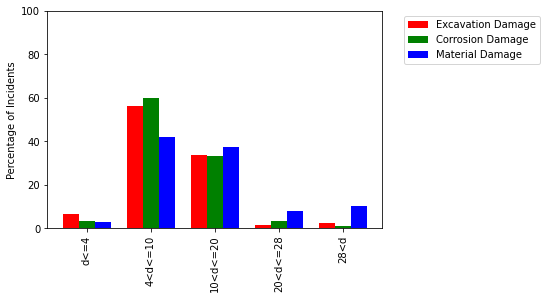

In [110]:
n = len(list(excavation_d_percent.index))
x = np.arange(n)  # the label locations
width = 0.25  # the width of the bars

x_axis = list(excavation_d_percent.index)

fig, ax = plt.subplots()
plt.bar(x , list(excavation_d_percent.values), width, color = 'r', label='Excavation Damage')
plt.bar(x + width, list(corrosion_d_percent.values), width, color = 'g', label='Corrosion Damage')
plt.bar(x + width*2, list(material_d_percent.values), width, color = 'b', label='Material Damage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Incidents')
ax.set_ylim(top=100)
ax.set_title('')
plt.xticks(x + width, x_axis, rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\cause_diameter_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')  

plt.show()

In [116]:
#Calculating SMYS percentages for plotting
pipeline_function = incident_df['PIPELINE_FUNCTION'].value_counts(normalize=True)[:]*100

smys_percent = pd.Series(dtype=float)
smys_percent['Greater than 20% SMYS'] = pipeline_function['> 20% SMYS REGULATED TRUNKLINE/TRANSMISSION'] + pipeline_function['> 20% SMYS REGULATED GATHERING']
smys_percent['Less than 20% SMYS'] = pipeline_function['=< 20% SMYS REGULATED TRUNKLINE/TRANSMISSION'] + pipeline_function['=< 20% SMYS REGULATED GATHERING']
smys_percent

Greater than 20% SMYS    83.379888
Less than 20% SMYS       16.620112
dtype: float64

In [118]:
#Creating SMYS ranges, alternative way to above. easier for later on
incident_df['SMYS_Cat'] = None

incident_df.loc[(incident_df['PIPELINE_FUNCTION'] == '> 20% SMYS REGULATED TRUNKLINE/TRANSMISSION') | (incident_df['PIPELINE_FUNCTION'] == '> 20% SMYS REGULATED GATHERING'), 'SMYS_Cat'] = 'Greater than 20%'
incident_df.loc[(incident_df['PIPELINE_FUNCTION'] == '=< 20% SMYS REGULATED TRUNKLINE/TRANSMISSION') | (incident_df['PIPELINE_FUNCTION'] == '=< 20% SMYS REGULATED GATHERING'), 'SMYS_Cat'] = 'Less than 20%'

incident_df['SMYS_Cat'].value_counts(normalize=True)[:]*100

Greater than 20%    83.379888
Less than 20%       16.620112
Name: SMYS_Cat, dtype: float64

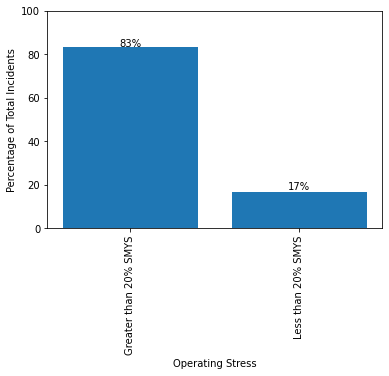

In [187]:
#Stacked bar graph
#smys_percent.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(smys_percent.index,smys_percent.values , align = 'center' ) 

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Operating Stress') 


#y-axis labels 
plt.ylabel('Percentage of Total Incidents') 
plt.ylim(top=100)


#plot title 
#plt.title('Ditribution of Incidents by Hoop Stress') 

#Legend
#plt.legend(['Hoop Stress'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\SMYS_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [119]:
excavation_smys_percent = incident_df.loc[incident_df['MAP_CAUSE']=='EXCAVATION DAMAGE']['SMYS_Cat'].value_counts(normalize=True)[:]*100
corrosion_smys_percent = incident_df.loc[incident_df['MAP_CAUSE']=='CORROSION']['SMYS_Cat'].value_counts(normalize=True)[:]*100
material_smys_percent = incident_df.loc[incident_df['MAP_CAUSE']=='MATERIAL/WELD/EQUIP FAILURE']['SMYS_Cat'].value_counts(normalize=True)[:]*100

In [123]:
excavation_smys_percent= excavation_smys_percent[['Greater than 20%', 'Less than 20%']]
corrosion_smys_percent = corrosion_smys_percent[['Greater than 20%', 'Less than 20%']]
material_smys_percent = material_smys_percent[['Greater than 20%', 'Less than 20%']]

In [153]:
material_smys_percent

Greater than 20%    95.483871
Less than 20%        4.516129
Name: SMYS_Cat, dtype: float64

In [159]:
incident_df.loc[incident_df['SMYS_Cat'] == 'Greater than 20%']['Diameter_Range'].value_counts(normalize=True)[:]*100

4<d<=10     52.951699
10<d<=20    35.957066
28<d         4.472272
20<d<=28     4.293381
d<=4         2.325581
Name: Diameter_Range, dtype: float64

In [158]:
incident_df.loc[incident_df['SMYS_Cat'] == 'Less than 20%']['Diameter_Range'].value_counts(normalize=True)[:]*100
#Diameter_Range
#COMMODITY_RELEASED_TYPE
#PIPELINE_FUNCTION

4<d<=10     66.981132
10<d<=20    20.754717
d<=4         9.433962
20<d<=28     2.830189
Name: Diameter_Range, dtype: float64

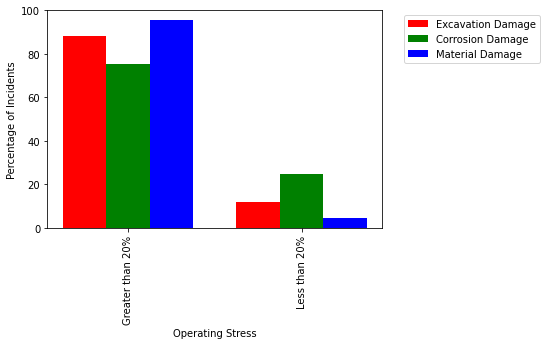

In [188]:
n = len(list(excavation_smys_percent.index))
x = np.arange(n)  # the label locations
width = 0.25  # the width of the bars

x_axis = list(excavation_smys_percent.index)

fig, ax = plt.subplots()
plt.bar(x , list(excavation_smys_percent.values), width, color = 'r', label='Excavation Damage')
plt.bar(x + width, list(corrosion_smys_percent.values), width, color = 'g', label='Corrosion Damage')
plt.bar(x + width*2, list(material_smys_percent.values), width, color = 'b', label='Material Damage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Incidents')
ax.set_ylim(top=100)
ax.set_title('')
plt.xticks(x + width, x_axis, rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Operating Stress')

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\cause_smys_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')  

plt.show()

In [125]:
#Consequences
release_type = incident_df['RELEASE_TYPE'].value_counts()
release_type

LEAK                   500
MECHANICAL PUNCTURE    123
RUPTURE                 63
OTHER                   30
Name: RELEASE_TYPE, dtype: int64

In [126]:
#Consequences
release_type_percent = incident_df['RELEASE_TYPE'].value_counts(normalize=True)[:]*100
release_type_percent

LEAK                   69.832402
MECHANICAL PUNCTURE    17.178771
RUPTURE                 8.798883
OTHER                   4.189944
Name: RELEASE_TYPE, dtype: float64

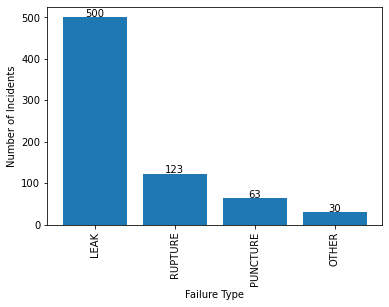

In [189]:
#Stacked bar graph
#release_type.plot(kind = 'bar', stacked = True, mark_right = True)

n=len(release_type.index)
x = np.arange(n)
labels = ['LEAK', 'RUPTURE', 'PUNCTURE', 'OTHER']
windth = 10
fig, ax = plt.subplots()

a = ax.bar(x ,release_type.values , align = 'center' ) 

#xticks 
plt.xticks(x, labels, rotation=90) 

#x-axis labels 
plt.xlabel('Failure Type') 


#y-axis labels 
plt.ylabel('Number of Incidents') 
#plt.ylim(top=100)


#plot title 
#plt.title('Number of Incidents by Release Type') 

#Legend
#plt.legend(['Release Type'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\Release_type'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

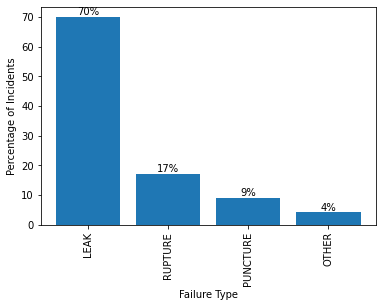

In [190]:
#Stacked bar graph
#release_type.plot(kind = 'bar', stacked = True, mark_right = True)

n=len(release_type_percent.index)
x = np.arange(n)
labels = ['LEAK', 'RUPTURE', 'PUNCTURE', 'OTHER']
windth = 10
fig, ax = plt.subplots()

a = ax.bar(x,release_type_percent.values , align = 'center' ) 

#xticks 
plt.xticks(x, labels, rotation=90) 

#x-axis labels 
plt.xlabel('Failure Type') 


#y-axis labels 
plt.ylabel('Percentage of Incidents') 
#plt.ylim(top=100)


#plot title 
#plt.title('Distribution of Incidents by Release Type') 

#Legend
#plt.legend(['Release Type'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\Release_type_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [191]:
cause_release_type = pd.DataFrame()

cause_release_type['EXCAVATION DAMAGE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'EXCAVATION DAMAGE']['RELEASE_TYPE'].value_counts(normalize=True)[:]*100

cause_release_type['NATURAL FORCE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'NATURAL FORCE DAMAGE']['RELEASE_TYPE'].value_counts(normalize=True)[:]*100
cause_release_type['CORROSION'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'CORROSION']['RELEASE_TYPE'].value_counts(normalize=True)[:]*100
cause_release_type['MATERIAL FAILURE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE']['RELEASE_TYPE'].value_counts(normalize=True)[:]*100
cause_release_type['ALL OTHER CAUSES'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'ALL OTHER CAUSES']['RELEASE_TYPE'].value_counts(normalize=True)[:]*100
cause_release_type['OTHER OUTSIDE FORCE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'OTHER OUTSIDE FORCE DAMAGE']['RELEASE_TYPE'].value_counts(normalize=True)[:]*100

cause_release_type['INCORRECT OPERATION'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'INCORRECT OPERATION']['RELEASE_TYPE'].value_counts(normalize=True)[:]*100

In [192]:
cause_release_type = cause_release_type[['EXCAVATION DAMAGE', 'CORROSION', 'MATERIAL FAILURE', 'NATURAL FORCE', 'OTHER OUTSIDE FORCE', 'INCORRECT OPERATION', 'ALL OTHER CAUSES']]

In [193]:
cause_release_type.T

,MECHANICAL PUNCTURE,LEAK,RUPTURE,OTHER
EXCAVATION DAMAGE,81.343284,8.955224,7.462687,2.238806
CORROSION,NaN,94.478528,4.294479,1.226994
MATERIAL FAILURE,NaN,77.419355,18.064516,4.516129
NATURAL FORCE,5.000000,75.000000,20.000000,NaN
OTHER OUTSIDE FORCE,30.000000,42.500000,5.000000,22.500000
INCORRECT OPERATION,NaN,64.000000,20.000000,16.000000
ALL OTHER CAUSES,6.250000,75.000000,NaN,18.750000


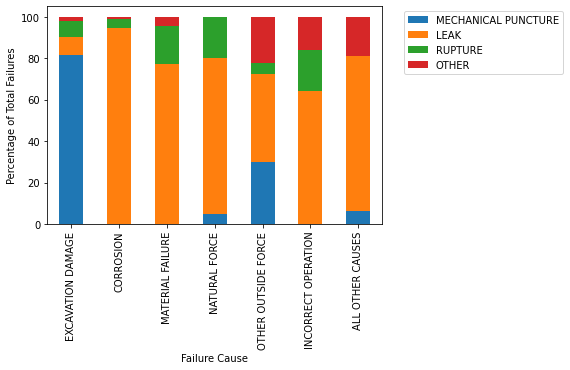

In [194]:
#Stacked bar graph
cause_release_type.T.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Failure Cause') 


#y-axis labels 
plt.ylabel('Percentage of Total Failures') 


#plot title 
#plt.title('Ditribution of Incidents by Release Type') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#for n in df_diameter_short_percent:
    #for i, (cs, ab, pc) in enumerate(zip(df_diameter_short_percent.cumsum(1)[n], df_diameter_short_percent[n], df_diameter_short_percent[n])):
        #plt.text(i, cs - ab / 2, str(np.round(pc, 1)) + '%', 
                 #va = 'center', ha = 'center', rotation = 90, fontsize = 7)

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\cause_release_type_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [138]:
#Ignition Status
incident_df['ign_expl'] = None
incident_df.loc[(incident_df['IGNITE_IND'] == 'YES') & (incident_df['EXPLODE_IND'] == 'NO'),'ign_expl'] = 'Ignited Only'
incident_df.loc[(incident_df['IGNITE_IND'] == 'YES') & (incident_df['EXPLODE_IND'] == 'YES'),'ign_expl'] = 'Explosion'
incident_df.loc[(incident_df['IGNITE_IND'] == 'NO'),'ign_expl'] = 'Not Ignited'

In [139]:
ign_expl_percent = incident_df['ign_expl'].value_counts(normalize=True)[:]*100
ign_expl_percent.values

array([95.94972067,  2.65363128,  1.39664804])

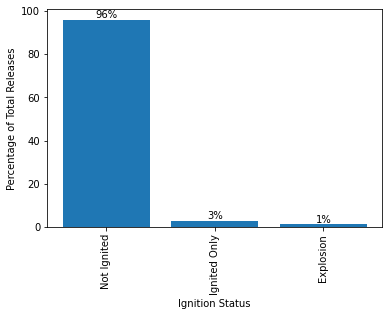

In [140]:
#Stacked bar graph
#ign_expl_percent.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(ign_expl_percent.index,ign_expl_percent.values , align = 'center' ) 

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Ignition Status') 


#y-axis labels 
plt.ylabel('Percentage of Total Releases') 
#plt.ylim(top=100)


#plot title 
plt.title('') 

#Legend
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\ignition_explosion_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [195]:
release_type_ignition = pd.DataFrame()

release_type_ignition['LEAK'] = None
release_type_ignition['RUPTURE'] = None
release_type_ignition['MECHANICAL'] = None
release_type_ignition['OTHER'] = None

#need to make sure the first one includes all types (ignition results/rows)
release_type_ignition['RUPTURE'] = incident_df.loc[incident_df['RELEASE_TYPE'] == 'RUPTURE']['ign_expl'].value_counts(normalize=True)[:]*100

release_type_ignition['LEAK'] = incident_df.loc[incident_df['RELEASE_TYPE'] == 'LEAK']['ign_expl'].value_counts(normalize=True)[:]*100
release_type_ignition['MECHANICAL'] = incident_df.loc[incident_df['RELEASE_TYPE'] == 'MECHANICAL PUNCTURE']['ign_expl'].value_counts(normalize=True)[:]*100
release_type_ignition['OTHER'] = incident_df.loc[incident_df['RELEASE_TYPE'] == 'OTHER']['ign_expl'].value_counts(normalize=True)[:]*100


In [196]:
release_type_ignition.T

,Not Ignited,Explosion,Ignited Only
LEAK,98.600000,NaN,1.400000
RUPTURE,85.714286,11.111111,3.174603
MECHANICAL,91.869919,2.439024,5.691057
OTHER,90.000000,NaN,10.000000


In [161]:
incident_df.loc[(incident_df['ign_expl'] == 'Ignited Only') | (incident_df['ign_expl'] == 'Explosion')]['RELEASE_TYPE'].value_counts(normalize=True)[:]*100

MECHANICAL PUNCTURE    34.482759
RUPTURE                31.034483
LEAK                   24.137931
OTHER                  10.344828
Name: RELEASE_TYPE, dtype: float64

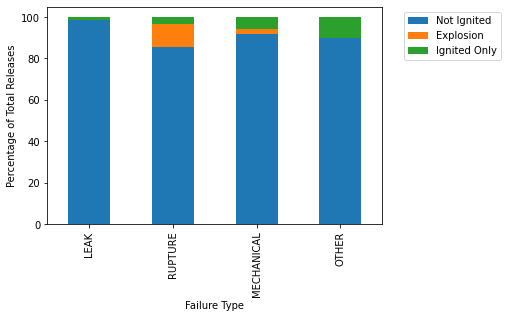

In [197]:
#Stacked bar graph
release_type_ignition.T.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Failure Type') 


#y-axis labels 
plt.ylabel('Percentage of Total Releases') 


#plot title 
#plt.title('Ditribution of Releases by Ignition Status') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#for n in df_diameter_short_percent:
    #for i, (cs, ab, pc) in enumerate(zip(df_diameter_short_percent.cumsum(1)[n], df_diameter_short_percent[n], df_diameter_short_percent[n])):
        #plt.text(i, cs - ab / 2, str(np.round(pc, 1)) + '%', 
                 #va = 'center', ha = 'center', rotation = 90, fontsize = 7)

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\release_ignition_explosion_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [198]:
cause_ignition_status = pd.DataFrame()

cause_ignition_status['NATURAL FORCE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'NATURAL FORCE DAMAGE']['ign_expl'].value_counts(normalize=True)[:]*100

cause_ignition_status['CORROSION'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'CORROSION']['ign_expl'].value_counts(normalize=True)[:]*100
cause_ignition_status['MATERIAL FAILURE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE']['ign_expl'].value_counts(normalize=True)[:]*100
cause_ignition_status['ALL OTHER CAUSES'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'ALL OTHER CAUSES']['ign_expl'].value_counts(normalize=True)[:]*100
cause_ignition_status['OTHER OUTSIDE FORCE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'OTHER OUTSIDE FORCE DAMAGE']['ign_expl'].value_counts(normalize=True)[:]*100
cause_ignition_status['EXCAVATION DAMAGE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'EXCAVATION DAMAGE']['ign_expl'].value_counts(normalize=True)[:]*100
cause_ignition_status['INCORRECT OPERATION'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'INCORRECT OPERATION']['ign_expl'].value_counts(normalize=True)[:]*100

In [199]:
cause_ignition_status = cause_ignition_status[['EXCAVATION DAMAGE', 'CORROSION', 'MATERIAL FAILURE', 'NATURAL FORCE', 'OTHER OUTSIDE FORCE', 'INCORRECT OPERATION', 'ALL OTHER CAUSES']]

In [200]:
cause_ignition_status.T

,Not Ignited,Ignited Only,Explosion
EXCAVATION DAMAGE,93.283582,4.477612,2.238806
CORROSION,99.693252,0.306748,NaN
MATERIAL FAILURE,96.129032,0.645161,3.225806
NATURAL FORCE,80.000000,15.000000,5.000000
OTHER OUTSIDE FORCE,90.000000,7.500000,2.500000
INCORRECT OPERATION,80.000000,20.000000,NaN
ALL OTHER CAUSES,100.000000,NaN,NaN


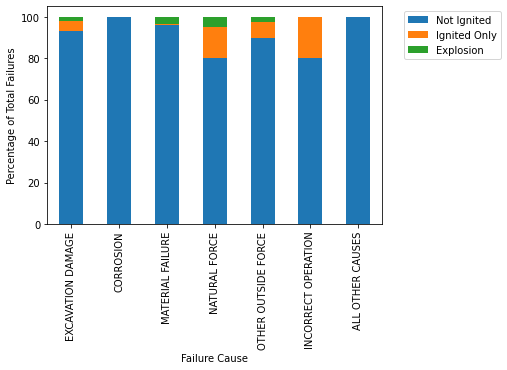

In [201]:
#Stacked bar graph
cause_ignition_status.T.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Failure Cause') 


#y-axis labels 
plt.ylabel('Percentage of Total Failures') 


#plot title 
#plt.title('Ditribution of Incidents by Ignition Status and Cause') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#for n in df_diameter_short_percent:
    #for i, (cs, ab, pc) in enumerate(zip(df_diameter_short_percent.cumsum(1)[n], df_diameter_short_percent[n], df_diameter_short_percent[n])):
        #plt.text(i, cs - ab / 2, str(np.round(pc, 1)) + '%', 
                 #va = 'center', ha = 'center', rotation = 90, fontsize = 7)

#save plot 
plot_path = os.getcwd() + '\\HL Incidents Plots\\cause_ignition_status_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();